In [1]:
# Import Python libraries Numpy, Pandas and Matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in the downloaded hdf5 data
data = pd.read_hdf("./egsim-predictions.hdf")
data

PGA                                                  \
             median                                          stddev   
   AkkarEtAlRjb2014 CauzziEtAl2014 ChiouYoungs2014 AkkarEtAlRjb2014   
0         -2.634423      -2.306242       -3.054635         0.712105   
1         -2.683710      -2.487553       -3.311486         0.712105   
2         -2.972271      -2.960965       -3.943890         0.712105   
3         -3.603309      -3.586632       -4.715649         0.712105   
4         -4.637384      -4.491284       -5.733864         0.712105   
5         -5.351462      -5.145325       -6.405091         0.712105   
6         -6.300322      -6.079458       -7.280032         0.712105   
7         -7.622033      -7.493961       -8.562902         0.712105   
8         -8.401576      -8.375281       -9.508015         0.712105   
9         -8.955747      -9.017111      -10.358885         0.712105   
10        -9.385925      -9.522183      -11.168248         0.712105   
11        -1.546589      -1.146113       -1.098878         0.712105   
12        -1.586189      -1.286848       -1.269320         0.712105   
13        -1.818032      -1.654323       -1.714004         0.712105   
14        -2.325036      -2.139999       -2.297742         0.712105   
15        -3.155859      -2.842264       -3.117559         0.712105   
16        -3.729581      -3.349998       -3.675730         0.712105   
17        -4.491938      -4.075182       -4.407251         0.712105   
18        -5.553861      -5.173306       -5.460074         0.712105   
19        -6.180180      -5.857498       -6.220210         0.712105   
20        -6.625426      -6.355710       -6.898754         0.712105   
21        -6.971051      -6.747707       -7.541040         0.712105   
22        -0.713196      -0.622900       -0.633585         0.712105   
23        -0.743108      -0.722662       -0.727625         0.712105   
24        -0.918233      -0.983294       -0.986142         0.712105   
25        -1.301203      -1.328026       -1.351707         0.712105   
26        -1.928774      -1.826900       -1.905303         0.712105   
27        -2.362140      -2.187805       -2.300461         0.712105   
28        -2.937994      -2.703502       -2.828589         0.712105   
29        -3.740128      -3.484742       -3.596594         0.712105   
30        -4.213224      -3.971627       -4.161002         0.712105   
31        -4.549546      -4.326202       -4.671209         0.712105   
32        -4.810617      -4.605202       -5.157174         0.712105   

                                           SA(0.2)                 \
                                            median                  
   CauzziEtAl2014 ChiouYoungs2014 AkkarEtAlRjb2014 CauzziEtAl2014   
0        0.776736        0.753944        -1.994505      -1.953175   
1        0.776736        0.754146        -2.045178      -2.123978   
2        0.776736        0.754533        -2.341850      -2.569131   
3        0.776736        0.754816        -2.990626      -3.155925   
4        0.776736        0.754991        -4.053768      -4.002057   
5        0.776736        0.755042        -4.787917      -4.612540   
6        0.776736        0.755074        -5.763449      -5.483181   
7        0.776736        0.755091        -7.122312      -6.799645   
8        0.776736        0.755095        -7.923766      -7.619147   
9        0.776736        0.755096        -8.493515      -8.215726   
10       0.776736        0.755097        -8.935785      -8.685085   
11       0.776736        0.685339        -0.832984      -0.659132   
12       0.776736        0.685473        -0.873969      -0.795036   
13       0.776736        0.685861        -1.113924      -1.149240   
14       0.776736        0.686414        -1.638665      -1.616164   
15       0.776736        0.687116        -2.498555      -2.289473   
16       0.776736        0.687470        -3.092349      -2.775278   
17       0.776736        0.687772        -3.881377      -3.468123   
18       0

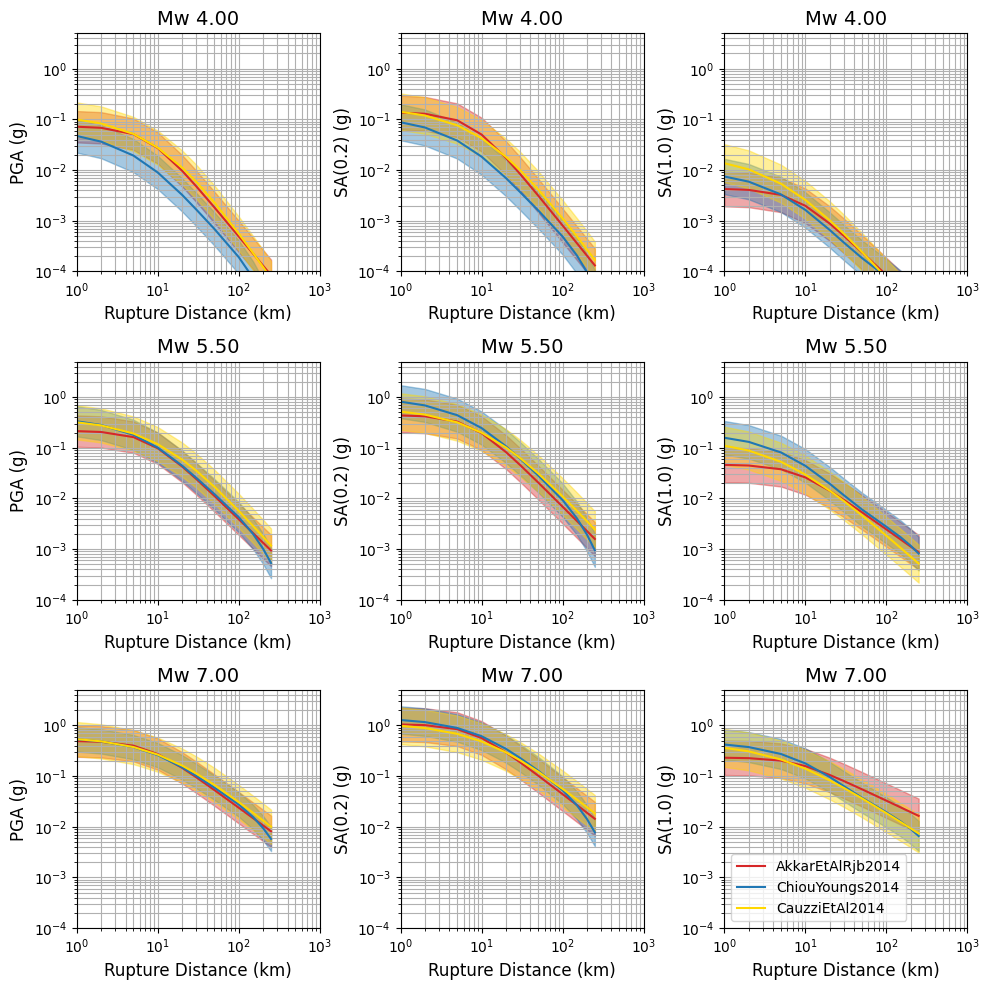

In [3]:
# Create a trellis plot of ground motion attenuation
fig, axs = plt.subplots(3, 3, figsize=(10,10))
mag_grps = data.groupby(("input_data", "rupture_parameter", "mag"))

gmm_colours = {
    "AkkarEtAlRjb2014": "tab:red",
    "ChiouYoungs2014": "tab:blue",
    "CauzziEtAl2014": "gold"
}
for i, (mag, mag_grp) in enumerate(mag_grps):
    for j, imt in enumerate(["PGA", "SA(0.2)", "SA(1.0)"]):
        for gmm, col in gmm_colours.items():
            median = mag_grp[imt]["median"][gmm]
            stddev = mag_grp[imt]["stddev"][gmm]
            rrup = mag_grp["input_data"]["distance_measure"]["rrup"]
            axs[i, j].fill_between(rrup, np.exp(median - stddev), np.exp(median + stddev),
                             color=col, alpha=0.4)
            axs[i, j].semilogx(rrup, np.exp(median), "-", color=col, label=gmm)
        axs[i, j].grid(which="both")
        axs[i, j].set_xlabel("Rupture Distance (km)", fontsize=12)
        axs[i, j].set_ylabel("%s (g)" % imt, fontsize=12)
        axs[i, j].set_xscale("log")
        axs[i, j].set_yscale("log")
        axs[i, j].set_xlim(1.0, 1000.0)
        axs[i, j].set_ylim(1.0E-4, 5.)
        axs[i, j].set_title("Mw %.2f" % mag, fontsize=14)

fig.tight_layout(w_pad=0.1)
axs[-1, -1].legend(loc="lower left")
